"Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and noninvasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician."

Dataset is available at:

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

Attribute Information:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP: Jitter (%), MDVP: Jitter(Abs),MDVP: RAP, MDVP: PPQ, Jitter: DDP - Several measures of variation in fundamental frequency

MDVP: Shimmer, MDVP: Shimmer(dB), Shimmer: APQ3, Shimmer: APQ5, MDVP: APQ, Shimmer: DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation

Based on the data available to you, you need to come up with the model which can predict the likelihood of Parkinson’s disease in patients

Steps:

1. Pre-processing, EDA and removing of outliers from data (2.5 points)
2. Use Decision tree and optimize the depth of the tree and leaf nodes (hyper parameters tuning) to come up with the best model (15 points)
3. Use logistic regression modelling to model the data (5 points)
4. Print the confusion matrix for both Logistic and decision tree model (2.5 points)

Please Note: In this problem, we need to try to achieve the best of both worlds

1. The probability of predicting a person who in reality has Parkinson’s disease but predicted as healthy by the model has to be minimum. (1st priority)
2. Overall accuracy of the model (2nd priority)

In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
prkns_df = pd.read_csv(url)
prkns_df.head()
prkns_df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
#Drop name and status as they are not relevant to the data analysis
prkns_df2 = prkns_df.drop(["name","status"],axis=1)
prkns_df2[~prkns_df2.applymap(np.isreal).all(1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE


## There are no non-numeric values.

In [6]:
#check for missing values if any...
missing_values=prkns_df2.columns[prkns_df2.isnull().any()]
prkns_df2[missing_values].isnull().sum()

Series([], dtype: float64)

## There are no missing values

In [7]:
prkns_df.groupby(["status"]).count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# Outlier identification and treatment

In [8]:
prkns_df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [12]:
#prkns_df2[['MDVP:Fo(Hz)']].boxplot()  #No outliers
#prkns_df2[['MDVP:Fhi(Hz)']].boxplot() #Has outliers
#prkns_df2[['MDVP:Flo(Hz)']].boxplot() #Has outliers
#prkns_df2[['MDVP:Jitter(%)']].boxplot() #Has outliers
#prkns_df2[['MDVP:Jitter(Abs)']].boxplot() #Has outliers
#prkns_df2[['MDVP:RAP']].boxplot() #Has outliers
#prkns_df2[['MDVP:PPQ']].boxplot() #Has outliers
#prkns_df2[['Jitter:DDP']].boxplot() #Has outliers
#prkns_df2[['MDVP:Shimmer']].boxplot() #Has outliers
#prkns_df2[['MDVP:Shimmer(dB)']].boxplot() #Has outliers
#prkns_df2[['Shimmer:APQ3']].boxplot() #Has outliers
#prkns_df2[['Shimmer:APQ5']].boxplot() #Has outliers
#prkns_df2[['MDVP:APQ']].boxplot() #Has outliers
#prkns_df2[['Shimmer:DDA']].boxplot() #Has outliers
#prkns_df2[['NHR']].boxplot() #Has outliers
#prkns_df2[['HNR']].boxplot() #Has outliers
#prkns_df2[['RPDE']].boxplot() #No outliers
#prkns_df2[['DFA']].boxplot() #No outliers
#prkns_df2[['spread1']].boxplot() #Has outliers
#prkns_df2[['spread2']].boxplot() #Has outliers
#prkns_df2[['D2']].boxplot() #Has outliers
#prkns_df2[['PPE']].boxplot() #Has outliers

In [13]:
from scipy import stats

#------------------------------------------------------------------------------
# accept a dataframe, identify outliers of the specified column, return column with NaN marked outliers 
#------------------------------------------------------------------------------

def mark_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in[col_name][(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]  = np.NaN
    return df_in[col_name]

# Mark all the outliers in each of the identified continuous variables.: Age, Exp, Income, FamMembers, CCAvg and Mortage
#TheraBank_df.Age = mark_outlier(TheraBank_df,'Age')
prkns_df2['MDVP:Fo(Hz)'] = mark_outlier(prkns_df2,'MDVP:Fo(Hz)')
for clmn in prkns_df2.columns:
    prkns_df2[clmn] = mark_outlier(prkns_df2,clmn)

#Let us check to see if there are any blank/null values 
prkns_df2[prkns_df2.isnull().any(axis=1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,NaN,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,NaN,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,NaN,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
17,168.778,232.181,75.603,0.00718,0.000040,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,20.376,0.631099,0.605417,NaN,0.434326,3.007463,NaN
18,153.046,175.829,68.623,0.00742,0.000050,0.00364,0.00432,0.01092,0.05517,0.542,...,NaN,0.07413,0.03160,17.280,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
42,237.226,247.326,NaN,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,241.404,248.834,NaN,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,243.439,250.912,NaN,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.01033,0.02330,0.00454,25.368,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,242.852,255.034,NaN,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.01014,0.02542,0.00476,25.032,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706


In [14]:
# replace the missing values in prkns_df2 with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
prkns_df2 = prkns_df2.fillna(prkns_df2.median())

In [15]:
#Let us check to see if there are any blank/null values 
prkns_df2[prkns_df2.isnull().any(axis=1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE


## 47 records out of 197 have outliers which are replaced with median. 

In [16]:
# Pairplot using sns

sns.pairplot(prkns_df2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
#Find the correlation of all independent variables with dependent varible 
#and drop variables whose correlation lies in the range -0.1 to 0.1.

p_df = prkns_df.drop(["name"],axis=1)

for i in p_df.columns[:-1]:
    l = p_df[i].corr(p_df["status"])
    if float(l) < -0.1 or float(l) < 0.1:
        p_df.pop(i)
print(p_df.columns)
print(len(p_df.columns))
p_df.corr()

Index(['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
19


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Jitter(%),1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058
Shimmer:APQ3,0.746625,0.697153,0.744912,0.763580,0.744894,0.987625,0.963198,1.000000,0.960070,0.896645,1.000000,0.716207,0.347617,0.435242,0.151124,0.610967,0.402243,0.467265,0.645377
Shimmer:APQ5,0.725561,0.648961,0.709927,0.786780,0.709907,0.982835,0.973751,0.960070,1.000000,0.949146,0.960072,0.658080,0.351148,0.399903,0.213873,0.646809,0.457195,0.502174,0.702456
MDVP:APQ,0.758255,0.648793,0.737455,0.804139,0.737439,0.950083,0.960977,0.896645,0.949146,1.000000,0.896647,0.694019,0.364316,0.451379,0.157276,0.673158,0.502188,0.536869,0.721694


In [18]:
# Number of Independent columns have been reduced from 22 to 19 

#  Using Decision tree and optimizing the depth of the tree and leaf nodes (hyper parameters tuning) to come up with the best model 

In [19]:
X = p_df.drop(["status"],axis=1).values
y = prkns_df["status"].values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [20]:
print("Training data length:", len(X_train))
print("Test data length:", len(X_test))

Training data length: 136
Test data length: 59


In [21]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.  
                           
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
dt_model.score(X_test , y_test)

0.864406779661017

In [23]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[ 8  4]
 [ 4 43]]


# Hypr parameter tuning - max_depth

In [24]:
#The first parameter to tune is max_depth. This indicates how deep the tree can be. 
#The deeper the tree, the more splits it has and it captures more information about the data. 
#We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc (area under curve) scores
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7907801418439717

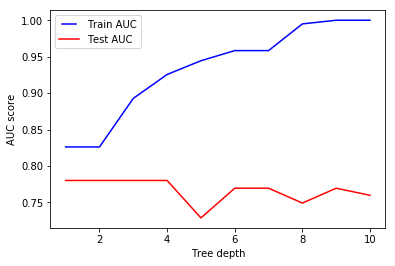

In [25]:
import matplotlib.pyplot as plt
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [26]:
# max_depth: We see that our model overfits for large depth values. The tree  predicts all of the train data, however, it fails to generalize the findings for new data.  

# # Hypr parameter tuning - min_samples_leaf 
The minimum number of samples required to be at a leaf node. describe the minimum number of samples at the leafs, the base of the tree.

[0.05 0.1  0.15 0.2  0.25]


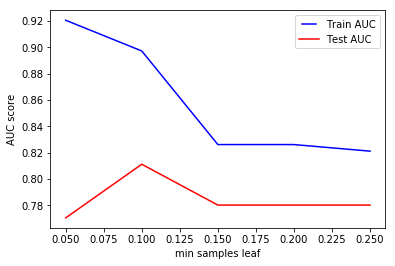

In [27]:
min_samples_leafs = np.linspace(0.05, 0.25, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [44]:
# min_samples_leaf: We see that our model underfits for large min_samples_leaf values. 

In [45]:
# The optimal model considering the hyper parameters is with max_depth=5 and min_samples_leaf=1

In [46]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
dt_model.score(X_test , y_test)

0.864406779661017

In [48]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[ 8  4]
 [ 4 43]]


# Logistic Regression Model and confusion matrix

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("Accuracy score of train data",accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Accuracy score of test data",accuracy_score(y_test, y_pred))


print(metrics.confusion_matrix(y_test, y_pred))


Accuracy score of train data 0.8308823529411765
Accuracy score of test data 0.847457627118644
[[ 7  5]
 [ 4 43]]
